In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

In [2]:
iris_data = pd.read_csv('iris.data.csv')
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
colums_name =  ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'class']
iris_data.columns = colums_name #add header column
iris_data.head()

,Sepal length,Sepal width,Petal length,Petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='class', ylabel='count'>

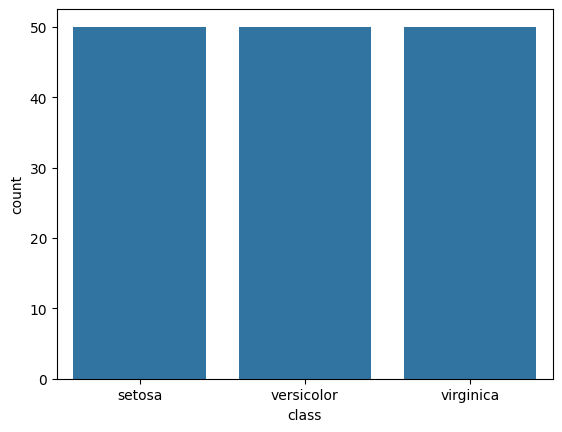

In [4]:
sns.countplot(x='class', data=iris_data )

[Text(0.5, 1.0, 'Sepal Length and Sepal Width')]

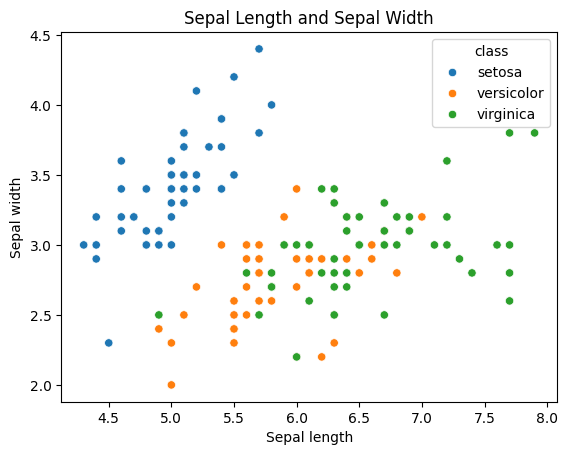

In [5]:
fig1 = sns.scatterplot(x='Sepal length', y='Sepal width',hue='class', data=iris_data)
fig1.set(title='Sepal Length and Sepal Width')

[Text(0.5, 1.0, 'Petal Length and Petal Width')]

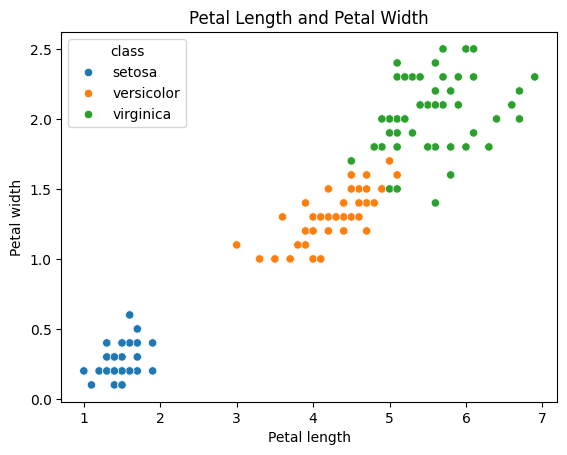

In [6]:
fig2 = sns.scatterplot(x='Petal length', y='Petal width',hue='class', data=iris_data)
fig2.set(title='Petal Length and Petal Width')

In [7]:
features = iris_data.iloc[:, 0:4] #Select all data in the sepal length column, sepal width, petal length, petal width to be stored in features. 
label = iris_data.iloc[:, 4] #Select data in the label column to be stored in the label.
print("Features : " )
print(features)
print("Label  : ")
print(label)

Features : 
     Sepal length  Sepal width  Petal length  Petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
Label  : 
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, Length: 150, dtype: object


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, label, test_size=0.2, random_state=0) 
print('Jumlah data train' ,X_train.shape[0])
print('Jumlah data test', y_test.shape[0])

Jumlah data train 120
Jumlah data test 30


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5,
weights='uniform')
knn.fit(X_train, y_train)
train_acc = knn.score(X_train, y_train)
print('The accuracy Of KNN classifier on training data is : {:.3f}'.format(train_acc))

The accuracy Of KNN classifier on training data is : 0.950


In [10]:
knn_test_acc = knn.score(X_test, y_test)
print('The accuracy Of KNN classifier on test data is : {:.3f}'.format(knn_test_acc))

The accuracy Of KNN classifier on test data is : 0.967


Text(0.5, 1.0, 'Confusion Matrix')

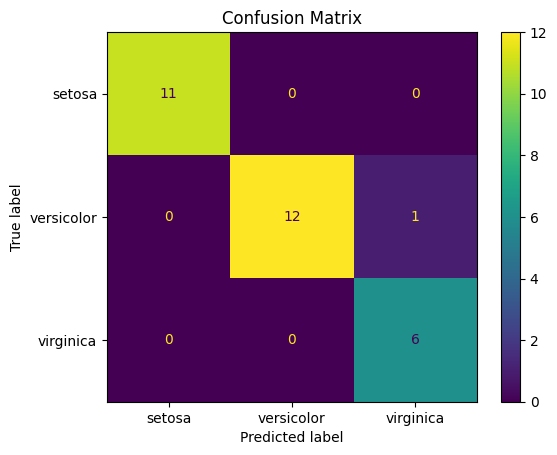

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(knn,X_test
,y_test)
disp.ax_.set_title('Confusion Matrix')

In [12]:
from subprocess import check_output
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [14]:
data = pd.read_csv('iris.data.csv')
features = data.iloc[:, 0:4]
label= data.iloc[:, 4]

In [16]:
from sklearn.neighbors import KNeighborsClassifier
n_range = list(range(1,10))
weight_list = ['uniform', 'distance']
param_grid = {'n_neighbors': n_range, 'weights':weight_list}
grid = GridSearchCV(estimator = KNeighborsClassifier(),

param_grid = param_grid,
cv = 3,
scoring = 'accuracy',
refit = True)

knn_model = make_pipeline(preprocessing.StandardScaler(),
grid)
knn_model.fit(features, label)
print('Accuracy of the tuned model: %.4f' %grid.best_score_)
print(grid.best_params_)


Accuracy of the tuned model: 0.9733
{'n_neighbors': 7, 'weights': 'distance'}


In [17]:
import pickle
with open('knn_model.pickle', 'wb') as f: pickle.dump(knn_model, f)

In [23]:
with open('knn_model.pickle', 'rb') as f:
    model = pickle.load(f)
# Predict new data
new_data =[6.5,3.5,5.5,2.0]
X= np.array([new_data])
prediction = model.predict(X)
print('Prediction of Species: {}'.format(prediction))

Prediction of Species: ['virginica']


d:\Apps\Python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
